In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

In [140]:
X = 6*np.random.rand(100,1) - 3
y = 0.5*X**2 + 1.5*X + 2 + np.random.rand(100,1)

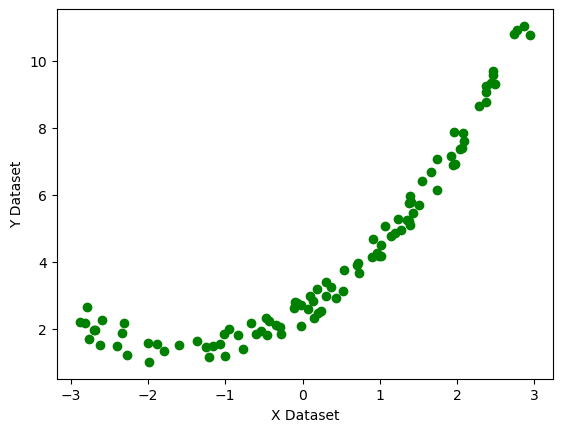

In [142]:
plt.scatter(X,y,color='g')
plt.xlabel('X Dataset')
plt.ylabel('Y Dataset')
plt.show()

In [144]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [146]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [148]:
# Prediction
y_pred = regression.predict(X_test)
score  = r2_score(y_pred, y_test)

In [150]:
score

0.6187401633475047

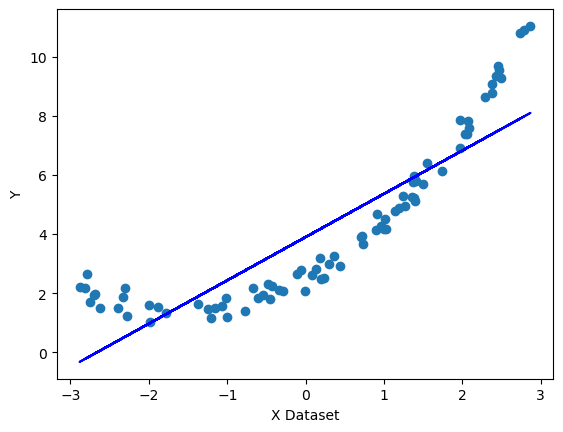

In [152]:
# Let's visualize this model

plt.plot(X_train, regression.predict(X_train), color='b')
plt.scatter(X_train, y_train)
plt.xlabel('X Dataset')
plt.ylabel('Y')
plt.show()

In [154]:
# As we see, we applied Simple Linear Regression on the dataset and got a result with high error.
# Now let's solve this  with the help of Polynomial regression.

In [160]:
# Polynomial Tranformation

poly = PolynomialFeatures(degree=2, include_bias=True)

In [166]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [170]:
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.981299727482442


In [172]:
regression.coef_

array([[0.        , 1.52464617, 0.50420606]])

In [174]:
regression.intercept_

array([2.48269017])

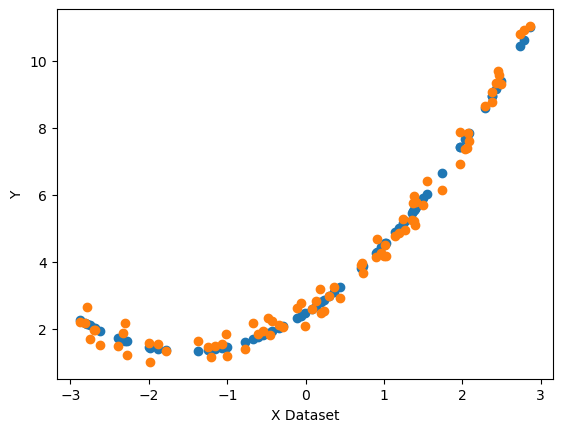

In [184]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)
plt.xlabel('X Dataset')
plt.ylabel('Y')
plt.show()

## Prediction of new dataset

In [187]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

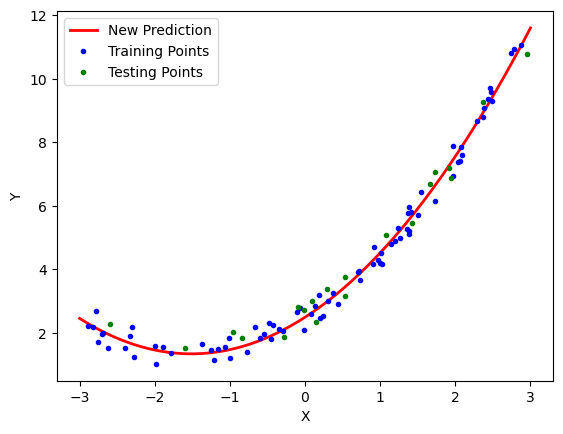

In [193]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label='New Prediction')
plt.plot(X_train, y_train, "b.", label='Training Points')
plt.plot(X_test, y_test, "g.", label='Testing Points')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

#### Create Pipeline(generic function) for n degrees

In [206]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    X_new_poly = poly.transform(X_new)
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([('Poly_Features', poly_features),
                                ('Lin_Reg', lin_reg)])
    poly_regression.fit(X_train, y_train)         # 1st Polynomial features and 2nd is fit of Linear Regression
    y_pred_new = poly_regression.predict(X_new)
    # Plotting prediction line
    plt.plot(X_new, y_pred_new, 'r', label="Degree"+str(degree), linewidth=3)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend("Upper Left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-4, 4, 0, 10])
    plt.show()

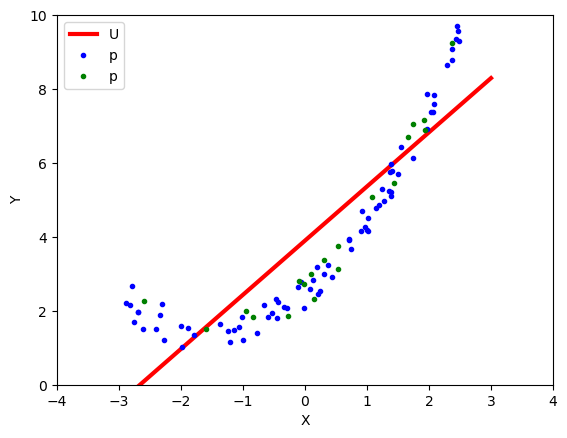

In [208]:
poly_regression(1)

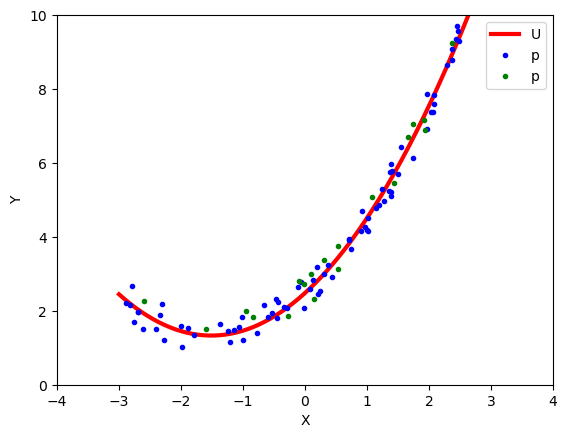

In [210]:
poly_regression(2)

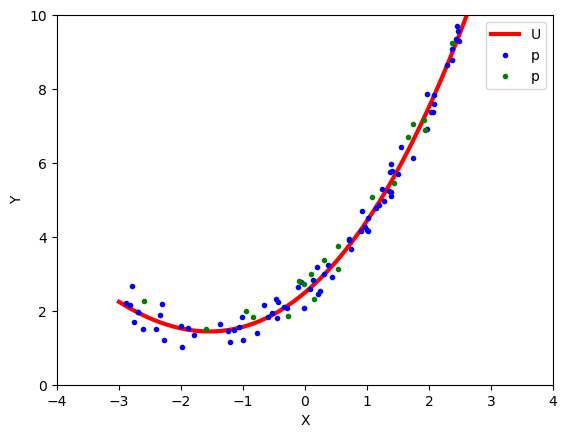

In [212]:
poly_regression(3)

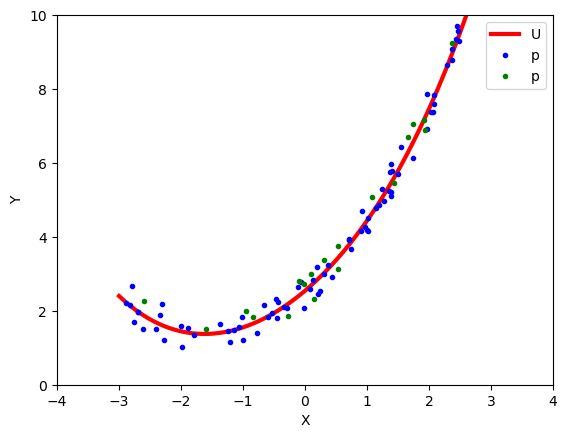

In [214]:
poly_regression(4)

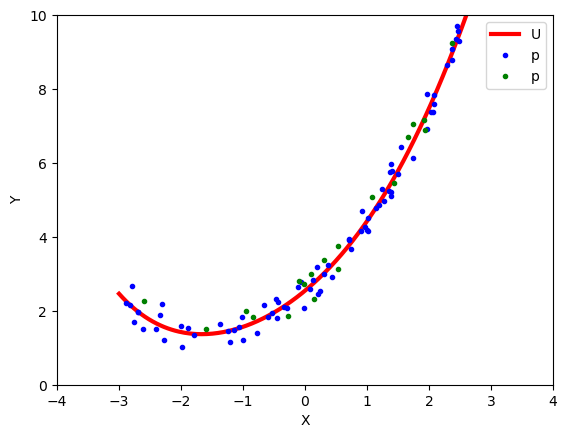

In [216]:
poly_regression(6)